# Analiza podstrani(subredditov) r/news in r/worldnews spletne strani Reddit

<a href="www.reddit.com]">Reddit</a> je ameriška zabavna, družbena in novičarska spletna stran.
Na Reddit uporabniki objavljajo razne povezave (večinoma na druge spletne strani), ki jih lahko drugi uporabniki ocenijo pozitivno (upvote) ali negativno (downvote) in komentirajo. Razdeljena je na več podstrani-subredditov.

Podstrani r/news in r/worldnews sta privzeti. Objave privzetih strani se pokažejo neregistriranim in novim uporabnikom na naslovnici(front page), ker se večina uporabnikov od podstrani ne odjavi, le prijavi, imajo tako privzete strani avtomatsko največ uporabnikov.

Primerjala sem novice dveh takih večjih podstrani r/news-novice in r/worldnews-svetovne novice. Podstrani so razdeljene na več kategorij, analizirala sem top-najboljše in controversial-kontroverzno.

## Hipoteze
    - 1. r/news bo imel več ameriških virov novic kot r/worldnews.
    - 2. Viri r/worldnews bodo kvalitetnejše od virov r/news. (The Guardian > FoxNews ) 
    - 3. Novice iz kategorije kontroverzno bodo iz tabloidov, rumenega tiska ali z zavajujočo vsebino*.
## Zanimivosti
    - Kateri viri so najbolje ocenjeni v posamezni kategoriji?
    - Kratek pregled 5 najbolje ocenjenih novic vsake kategorije
    - Kateri vir je najbolje ocenjen v r/news in r/worldnews skupaj
    - Kateri viri najbolj odstopajo (so izrazito bolje ocenjeni v posamezni kategoriji)
    - Primerjava povprečnih ocen in komentarjev najpogostejših virov, ki se pojavljajo v kategorijah kontroverzno in najboljse
    - Pogostost besed v kontroverzno in najboljše
    
\* Kontroverzne/manj kvalitetnejše vire sem določila s pomočjo lastnih izkušenj prebiranja novic in s pomočjo opisov škandalov posameznega vira na 
<a href=" https://en.wikipedia.org/wiki/Main_Page]"> Wikipediji </a>.

In [141]:
import pandas as pd

%matplotlib inline
pd.set_option('max_colwidth',400)

In [9]:
news_con=pd.read_csv('news_con.csv')
news_top=pd.read_csv('news_top.csv')
wnews_con=pd.read_csv('wnews_con.csv')
wnews_top=pd.read_csv('wnews_top.csv')

In [10]:
news_con_viri=news_con.groupby(['Vir'],as_index=False)
news_top_viri=news_top.groupby(['Vir'],as_index=False)
wnews_con_viri=wnews_con.groupby(['Vir'],as_index=False)
wnews_top_viri=wnews_top.groupby(['Vir'],as_index=False)

## Pregled podatkov
Zbrala sem 4 datoteke novic s spletne strani reddit in sicer: r/news-kontroverzno (news_con), r/news-najboljše(news_top), r/worldnews-kontroverzno (wnews_con) in r/worldnews-najboljše (wnews_top).
V vsaki kategoriji je 975 naslovov novic, vsaka novica ima svojo oceno (upvote-downvote), število komentarjev in vir.
Primer izgleda tabele:

In [11]:
news_top.head()

,Naslov,Score,Komentarji,Vir
0,Congress creates a bill that will give NASA a great budget for 2016. Also hides the entirety of CISA in the bill.,11547,3217,wired.com
1,"Cop stops influential business man for DUI. While on scene he receives a call from local leader to let the man go and the city manager even shows up on scene. The cop refuses and proceeds with the arrest, now the cop and his superior are being threatened with loss of their jobs.",9704,3605,ktul.com
2,"It’s unconstitutional to ban the homeless from sleeping outside, the federal government says",9400,4564,washingtonpost.com
3,A Government Error Just Revealed Snowden Was the Target in the Lavabit Case,9254,1953,wired.com
4,A toddler got meningitis. His anti-vac parents gave him an herbal remedy. The toddler died. Now his parents are on trial.,9210,5801,washingtonpost.com


V naslednjih datotekah sem združila novice po virih v posamezni kategoriji. Viri r/news-kontroverzno (news_con_viri), Viri r/news-najboljše(news_top_viri), Viri r/worldnews-kontroverzno (wnews_con_viri) in Viri r/worldnews-najboljše (wnews_top_viri).
Primer: news_top_viri

In [12]:
#V stolpcih Score in Komentarji je popvrečje komentarjev in ocene vseh novic danega vira.
news_top_viri.mean().head()

,Vir,Score,Komentarji
0,1027jackfm.iheart.com,5509.0,2578.0
1,11alive.com,5965.5,2804.5
2,12news.com,5072.0,1497.0
3,13wmaz.com,5742.0,5884.0
4,abajournal.com,6309.0,1954.0


### Hipoteza 1: r/news bo imel več ameriških virov novic kot r/worldnews
Že v samem opisu podstrani r/worldnews je zapisano, da stran dovoljuje povezave na vse novice, razen notranjih zadev in politike ZDA. Tako še s preštetjem pojavitve virov potrdimo, da hipoteza drži.

Združila sem skupaj število novic posameznega vira r/news in r/worldnews. Tako sem dobila vpogled v seznam najpogostejših virov na posamezni posamezni podstrani.

In [13]:
#preštejem število naslovov za posamezen vir
viri_news=pd.concat([news_con,news_top]).groupby(by='Vir',as_index=False).count()
viri_wnews=pd.concat([wnews_con,wnews_top]).groupby(by='Vir',as_index=False).count()

In [14]:
#najpogostejši viri za r/news
pogosti_news=viri_news[['Vir','Naslov']].sort_values(by='Naslov',ascending=False).head(n=10).set_index(['Vir'])
pogosti_news

,Naslov
Vir,
washingtonpost.com,104
theguardian.com,85
nytimes.com,44
foxnews.com,43
independent.co.uk,43
cnn.com,39
abcnews.go.com,39
arstechnica.com,33
usatoday.com,32


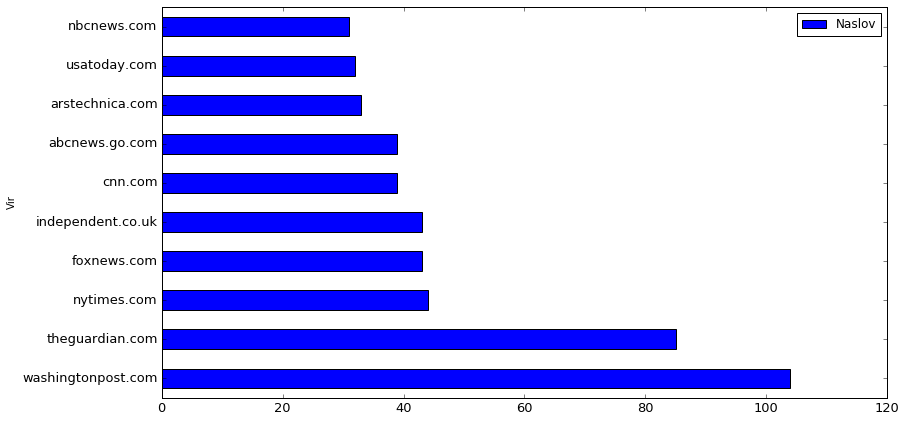

In [15]:
pogosti_news.plot(kind='barh',figsize =(13,7),fontsize=13)

In [16]:
#najpogostejši viri za r/worldnews
pogosti_wnews=viri_wnews[['Vir','Naslov']].sort_values(by='Naslov',ascending=False).head(n=10).set_index(['Vir'])
pogosti_wnews

,Naslov
Vir,
theguardian.com,110
rt.com,91
independent.co.uk,73
dailymail.co.uk,51
bbc.co.uk,51
bbc.com,45
reuters.com,43
nytimes.com,37
washingtonpost.com,27


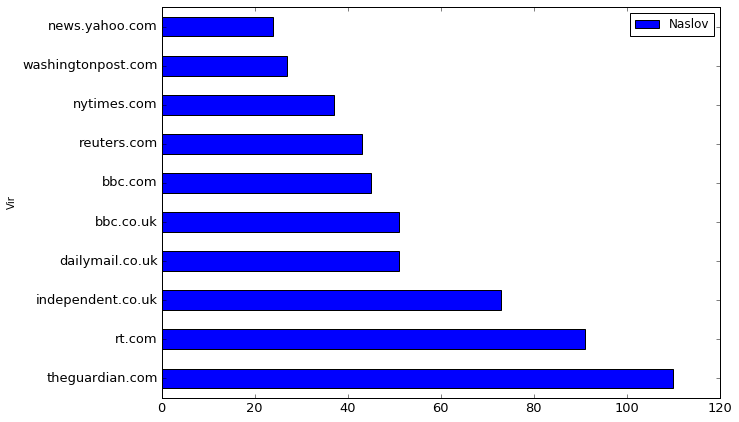

In [17]:
pogosti_wnews.plot(kind='barh',figsize =(10,7),fontsize=13)

Komentar: 
(Analiziram samo 10 najpogostejših virov)

V podstrani r/news se pojavita samo 2 neameriška vira (theguardian.com in independent.co.uk).
V razdelku r/worldnews sta se tudi samo 2 ameriška vira (nytimes.com, washingtonpost.com) uvrstila med 10 najpogostejših.

Predvidevem lahko, da so bralci in naročniki r/news večinoma prebivalci ZDA, ki jih seveda zanimajo novice povezane z ZDA, bralci r/worldnews pa so ostali obiskovalci Reddita.

Moja hipoteza je potrjena. V r/news je 8 ameriških virov, v r/wnews pa le 2.

###  Hipoteza 2:Viri r/worldnews bodo kvalitetnejše od virov r/news.


S pomočjo prejšnih tabel ugotovimo, da se med najpogostejšimi viri r/news izstopa samo foxnews.com, za katerega bi lahko trdili, da ne poroča najbolj objektivneje.

Med najpogostejšimi viri r/worldnews zasledimo 2, ki bi ju lahko uvrstili med pristranski in rumeni tisk. To sta na drugem mestu po pogostosti ruska spletna stran rt.com in britanski tabloid dailymail.co.uk.

Moja hipoteza ne drži. Viri r/worldnews in r/news so si enakovredni.

### Hipoteza 3 : Novice iz predela kontroverzno bodo iz tabloidov, rumenega tiska ali z zavajujočo vsebino.
Sedaj združim vire novic glede na kategoriji kontroverzno in najboljše.

In [18]:
novice_kontroverzno=pd.concat([wnews_con,news_con])
novice_najboljse=pd.concat([wnews_top,news_top])
#preštejem naslove posameznega vira
novice_kontroverzno_viri=novice_kontroverzno.groupby(by='Vir',as_index=False).count()
novice_najboljse_viri=novice_najboljse.groupby(by='Vir',as_index=False).count()
#nov stolpec, ki je povprečje komentarjev in ocene
novice_kontroverzno['povprecje']=(novice_kontroverzno.Komentarji+novice_kontroverzno.Score)/2
novice_najboljse['povprecje']=(novice_najboljse.Komentarji+novice_najboljse.Score)/2

In [19]:
#10 najpogostejših virov kategorije kotraverzno
naj10_con=novice_kontroverzno_viri[['Vir','Naslov']].sort_values(by='Naslov',ascending=False).head(n=10)
naj10_con

,Vir,Naslov
577,rt.com,84
146,dailymail.co.uk,56
733,washingtonpost.com,47
640,theguardian.com,44
252,foxnews.com,39
514,nytimes.com,31
322,independent.co.uk,31
123,cnn.com,29
57,bbc.co.uk,29
491,news.yahoo.com,28


In [20]:
#10 najpogostejših virov kategorije najboljše
naj10_top=novice_najboljse_viri[['Vir','Naslov']].sort_values(by='Naslov',ascending=False).head(n=10)
naj10_top

,Vir,Naslov
516,theguardian.com,151
237,independent.co.uk,85
578,washingtonpost.com,84
40,bbc.com,55
438,reuters.com,51
394,nytimes.com,50
39,bbc.co.uk,40
31,arstechnica.com,31
350,nbcnews.com,28
94,cnn.com,28


Na vrhu kontroverzno opazimo medij ruske vladne propagande. rt.com (Russia Today) slovi 
kot pristranska (seveda, v korist rusom) in zavajajoča novinarska hiša, znana po širjenju napačnih informacij.
V spodnji tabeli je zapisanih 5 najbolje ocenjenih novic rt.com. Opazimo, da so novice nenaklonjene ZDA (85, 459, 16, 124) (ZDA ne marajo Snowdena...) in seveda vzmirjajočo novico za uporabnike spleta (242).

In [21]:
novice_kontroverzno[novice_kontroverzno['Vir'] =='rt.com'].sort_values('povprecje', ascending=False).head()

,Naslov,Score,Komentarji,Vir,povprecje
85,The US has been voted as the most significant threat to world peace in a survey across 68 different countries,2229,5969,rt.com,4099.0
242,UK: Man jailed for 33 months for pirating ‘Fast &amp; Furious’,2387,3244,rt.com,2815.5
459,"Snowden nominated for Nobel Peace Prize by Swedish professor. ""[H]eroic effort at great personal cost.”",2166,687,rt.com,1426.5
16,Obama considers ending NSA surveillance programs.,1248,1059,rt.com,1153.5
124,"New video: Edward Snowden receives award from NSA, CIA, FBI and DOJ officials, breaks silence on NSA programs for the first time in Russia. Reveals new details on how mass surveillance makes us less - not more - safe.",1603,574,rt.com,1088.5


Na drugo mesto po pogostosti virov kontroverznih novic je britanski rumeni tračarski časopis dailymail.co.uk.
Neslavni konservativni tabloid je znan po nenatančnem, pristranskem in senzacionalističnem poročanju. Večkrat se zatekajo k razdvajanju javnosti in napihovanju težav. To potrdi tudi seznam 5 najbolje ocenjenih novic. 
Novice so povezane s tožbami(599), nasiljem (201, 318), pedofilijo(178) in življenskimi nepravicami(811). 

In [22]:
novice_kontroverzno[novice_kontroverzno['Vir'] =='dailymail.co.uk'].sort_values('Score', ascending=False).head()

,Naslov,Score,Komentarji,Vir,povprecje
201,Mobs of 'hundreds' of masked men rampage through Stockholm central station beating up refugee children,3341,6192,dailymail.co.uk,4766.5
599,"British man sues gym over ""sexist women-only hours""",1947,6567,dailymail.co.uk,4257.0
811,British couple who spent most of the money they made from canabis growing on paying for life changing operations and schooling for people in a poor Kenyan village gets sent to prison for 3 years.,1818,1644,dailymail.co.uk,1731.0
61,Roman Catholic church's paedophile investigator jailed for possessing thousnds of child porn images,769,783,dailymail.co.uk,776.0
318,'Someone's coming to get me': Terrified phone-hacking whistleblower feared for his life before he was found dead.\r\n,362,149,dailymail.co.uk,255.5


V kategoriji najboljše se med desetimi najpogostejšimi viri proti repu lestvice pojavi cnn.com (News Network Company). Nagibajo se na liberalno stran in pogosto blatijo republikance. Obstaja celotna stran wikipedije namenjena <a href=" https://en.wikipedia.org/wiki/CNN_controversies]">CNN "napakam"</a>.
Na prvem mestu prednjači theguardian.com. Da se prepričamo o razliki, primerjamo novice theguardian.com in dailymail.com.

In [23]:
novice_najboljse[novice_najboljse['Vir'] =='theguardian.com'].sort_values('povprecje', ascending=False).head()

,Naslov,Score,Komentarji,Vir,povprecje
213,"Revealed: the 30-year economic betrayal dragging down Generation Y’s income. Exclusive new data shows how debt, unemployment and property prices have combined to stop millennials taking their share of western wealth.",6754,13387,theguardian.com,10070.5
362,Putin calls Turkey 'accomplices of terrorists' after Russian jet shot down,6307,11112,theguardian.com,8709.5
509,Death tolls reach 158 in Paris.,5984,9341,theguardian.com,7662.5
111,"Vaping is 95% safer than smoking and could lead to the demise of the traditional cigarette, Public Health England (PHE) has said in the first official recognition that e-cigarettes are less damaging to health than smoking tobacco.",7361,6803,theguardian.com,7082.0
13,France decrees new rooftops must be covered in plants or solar panels. All new buildings in commercial zones across the country must comply with new environmental legislation,9954,4022,theguardian.com,6988.0


V primerjavi guardian.com in dailymail.co.uk je najbolj opazna razlika v jeziku. Guadrianovi naslovi so daljši, objektivni in jezik je na 'višjem nivoju'. 

Primer: **Gurardian(359)** *'Death tolls reach 158 in Paris.'*  Naslov nam pove vse o novici. Če nas zanima več podrobnosti jo kliknemo. Medtem pa **dailymail.com(307)** *''Someone's coming to get me': Terrified phone-hacking whistleblower feared for his life before he was found dead.'*  uborabi sezancionalistični naslov, ki bralca pritegne, a mu ne razkrije osnovnih informacij o novici. (clickbait novica). Po hitrem preledu novic na spletni strani dailymail.co.uk sem ugotovila, da pogosteje uporabljajo pogovorni jezik in tvorijo preprostejše stavke.
   

Kaže, da je moja hipoteza pravilna, vendar je slabo podprta.
Ustvarila bom še seznam 'manj' kvalitetnih virov in preverila, kolikokrat se pojavijo v kontroverzno in kolikokrat v najboljse.

In [24]:
seznam_mviri=['foxnews.com','rt.com','dailymail.com','mirror.co.uk','timesofisrael.com','tmz.com','msnbc.msn.com','haaretz.com','wnd.com']

In [25]:
#število pojavitev naslovov virov s seznama seznam_mviri za kontroverzno
novice_kontroverzno[(novice_kontroverzno['Vir'] == seznam_mviri[0]) |
                    (novice_kontroverzno['Vir'] == seznam_mviri[1]) |
                    (novice_kontroverzno['Vir'] == seznam_mviri[2]) | 
                    (novice_kontroverzno['Vir'] == seznam_mviri[3]) |
                    (novice_kontroverzno['Vir'] == seznam_mviri[4]) | 
                    (novice_kontroverzno['Vir'] == seznam_mviri[5]) |
                    (novice_kontroverzno['Vir'] == seznam_mviri[6]) | 
                    (novice_kontroverzno['Vir'] == seznam_mviri[7]) |
                    (novice_kontroverzno['Vir'] == seznam_mviri[8]) 
                   ].count()['Naslov']

186

In [26]:
#število pojavitev naslovov virov s seznama seznam_mviri za kontroverzno
novice_najboljse[(novice_najboljse['Vir'] == seznam_mviri[0]) |
                    (novice_najboljse['Vir'] == seznam_mviri[1]) |
                    (novice_najboljse['Vir'] == seznam_mviri[2]) | 
                    (novice_najboljse['Vir'] == seznam_mviri[3]) |
                    (novice_najboljse['Vir'] == seznam_mviri[4]) | 
                    (novice_najboljse['Vir'] == seznam_mviri[5]) |
                    (novice_najboljse['Vir'] == seznam_mviri[6]) | 
                    (novice_najboljse['Vir'] == seznam_mviri[7]) |
                    (novice_najboljse['Vir'] == seznam_mviri[8]) 
                   ].count()['Naslov']

40

Moja hipoteza je potrjena. V kontroverzno se pojavi veliko več novic kontroverznih virov kot v najboljše.

### Zanimivosti

In [27]:
#tabela vseh novic
vse_novice=pd.concat([news_con,wnews_con,news_top,wnews_top])
#tabela vseh virov
vse_novice_viri=vse_novice.groupby(by='Vir')

In [28]:
#vse 4 datoteke združene na skupen vir
news_viri=pd.merge(news_con,news_top,on='Vir', suffixes=('_news_con', '_news_top')).groupby(by='Vir', as_index=False).mean()
wnews_viri=pd.merge(wnews_con,wnews_top,on='Vir', suffixes=('_wnews_con', '_wnews_top')).groupby(by='Vir', as_index=False).mean()
vsi_viri=pd.merge(news_viri,wnews_viri,on='Vir').groupby(by='Vir', as_index=False).mean()

#### Kateri vir je najboljši v kateri posamezni kategoriji?
Izračunam ga glede na povprečje povprečja komentarjev in ocen posameznega vira.

##### Najboljši v r/news kontroverzno.

In [38]:
viri_povprecje_con=news_con_viri.mean()
#dodam še stolpec povprečje
viri_povprecje_con['povprecje']=viri_povprecje_con.iloc[:, 1:3].mean(axis=1)
#5 najboljših virov news-kontroverzno
naj5_news_con=viri_povprecje_con.sort_values(['povprecje'],ascending=False).head()
naj5_news_con

,Vir,Score,Komentarji,povprecje
360,thelocal.dk,4139.0,10426.0,7282.5
129,fox26houston.com,4332.0,5804.0,5068.0
253,nbcbayarea.com,3311.0,4770.0,4040.5
277,nj.com,3312.0,4174.0,3743.0
189,kansasfirstnews.com,2612.0,4794.0,3703.0


In [45]:
#novice_vira vrne tabelo novic vira v datoteki 
def novice_vira(dat,vir):
    return dat[dat['Vir']==vir]
#prvi vir vrne prvi vir v tabeli
def prvi_vir(dat,n):
    return dat.reset_index().Vir[n]

In [46]:
#Kakšne novice ima?
novice_vira(news_con,prvi_vir(naj5_news_con,0))
#Na prvem mestu je novica danskega vira. Na prvem mestu je predvsem zaradi šokantne zgodbe.

,Naslov,Score,Komentarji,Vir
403,Danish teen fought off her attacker - now she'll face fine. A 17-year-old girl who was physically and sexually attacked in Sønderborg will herself face charges for using pepper spray to fend off her assailant.,4139,10426,thelocal.dk


###### Najboljši v r/news najboljse 

In [42]:
viri_povprecje_top=news_top_viri.mean()
viri_povprecje_top['povprecje']=viri_povprecje_top.iloc[:, 1:3].mean(axis=1)
#5 Najboljših virov news_top
naj5_news_top=viri_povprecje_top.sort_values(['povprecje'],ascending=False).head()
naj5_news_top

,Vir,Score,Komentarji,povprecje
362,wdbj7.com,6768.000000,23756.0,15262.000000
182,ktla.com,5626.333333,18992.0,12309.166667
220,mysanantonio.com,7396.000000,13653.0,10524.500000
177,krdo.com,5522.000000,14886.0,10204.000000
79,dailykos.com,5344.000000,10594.0,7969.000000


In [43]:
#Kakšne novice ima?
novice_vira(news_top,prvi_vir(naj5_news_top))
#Novica o uboju novinarske ekipe pred kamero je sprožila ogromno debato. Ali je to tudi najboljkomentirana novica?

,Naslov,Score,Komentarji,Vir
100,Reporter &amp; Crew shot on live tv. WDBJ7. Video in comments.,6768,23756,wdbj7.com


###### Najboljši v r/wnews kontroverzno

In [50]:
viri_povprecje_wcon=wnews_con_viri.mean()
viri_povprecje_wcon['povprecje']=viri_povprecje_wcon.iloc[:, 1:3].mean(axis=1)
#5 Najboljših
naj5_wnews_con=viri_povprecje_wcon.sort_values(['povprecje'],ascending=False).head()
naj5_wnews_con

,Vir,Score,Komentarji,povprecje
177,ibtimes.com,3921.0,9618.0,6769.5
63,cphpost.dk,2404.0,10656.0,6530.0
350,thehill.com,2211.0,6491.0,4351.0
367,theweek.co.uk,1299.0,5287.0,3293.0
334,standard.co.uk,1343.0,5128.0,3235.5


In [51]:
#Kakšne novice ima?
novice_vira(wnews_con,prvi_vir(naj5_wnews_con,0))

,Naslov,Score,Komentarji,Vir
207,"Donald Trump A ‘Threat To Peace And Prosperity,’ German Vice Chancellor Says",3921,9618,ibtimes.com


##### Najboljši v r/wnews najboljse 

In [86]:
viri_povprecje_wtop=wnews_top_viri.mean()
viri_povprecje_wtop['povprecje']=viri_povprecje_wtop.iloc[:, 1:3].mean(axis=1)
# Najboljših 5
naj5_wnews_top=viri_povprecje_wtop.sort_values(['povprecje'],ascending=False).head()
naj5_wnews_top

,Vir,Score,Komentarji,povprecje
191,panamapapers.sueddeutsche.de,11883.0,12842.0,12362.5
223,self.worldnews,7880.0,14908.0,11394.0
282,translate.google.com,5588.0,15399.0,10493.5
254,theglobeandmail.com,5318.0,12789.0,9053.5
100,gu.com,9417.0,5784.0,7600.5


In [88]:
#Kakšne novice ima?
novice_vira(wnews_top,prvi_vir(naj5_wnews_top,0))


,Naslov,Score,Komentarji,Vir
3,"2.6 terabyte leak of Panamanian shell company data reveals ""how a global industry led by major banks, legal firms, and asset management companies secretly manages the estates of politicians, Fifa officials, fraudsters and drug smugglers, celebrities and professional athletes.""",11883,12842,panamapapers.sueddeutsche.de


Na prvem mestu je udarna novica o razkritju panamskih dokumentov. Dokumenti so razkrili in omajali ugled različnim svetnovnim politikom, športnikom in zvezdnikom. Velik zalogaj infomacij odkriva pranje denarja v 'slamantih podjetjih' v Panami.


self.worldnews ni vir novic, to so administratorji podstrani r/worldnews. Objava s tem naslovom vključuje več povezav na različne vire novice povezane s to temo. 

Vsak najbolje ocenjen vir (iz posamezne kategorije in nasplošno) ima po eno novico (razen ktla.com, ki ima 2). Pojavitev ene same novice enostavno pojasnii visoko povprečje novice, saj nobena slabše ocenjena novica ne pokvari povprečja kot pri virih z več novicami.

#### Najboljši vir nasploh
Poiščem najbolje ocenjen in komentiran vir v vseh kategorijah. 
Sedaj se odločim poiskati rezultat s pomočjo mediane. 

In [89]:
povprecje_kategorij=vsi_viri.mean()
seznam_kategorij=list (povprecje_kategorij.reset_index()['index'])
#relativne ocene in komentarji posameznega vira za vsako kategorijo
for i in seznam_kategorij:
    vsi_viri[i] = vsi_viri[i]/(vsi_viri.mean()[i])

In [90]:
#Vire razvrstim glede na mediano in glede na povprecje
vsi_viri['povprecje']=vsi_viri.iloc[:, 1:].mean(axis=1)
vsi_viri['median']=vsi_viri.iloc[:, 1:].median(axis=1)

In [91]:
#5 najboljših virov glede na povprecje
naj_viri_5=vsi_viri.sort_values(by='povprecje',ascending=False).head()
naj_viri_5

,Vir,Score_news_con,Komentarji_news_con,Score_news_top,Komentarji_news_top,Score_wnews_con,Komentarji_wnews_con,Score_wnews_top,Komentarji_wnews_top,median,povprecje
29,washingtonpost.com,2.794582,3.974554,1.031985,1.064776,4.504999,3.644675,0.942680,0.842814,2.533711,2.383553
12,independent.co.uk,3.060866,5.990779,0.995196,1.016629,2.472533,2.378561,0.983348,0.796377,2.310900,2.243238
4,businessinsider.com,4.388717,5.910062,0.866241,1.433373,0.726593,0.542777,0.991492,0.701615,1.061892,1.863865
1,bbc.com,0.029828,0.182754,0.976346,1.091468,5.300548,5.654239,0.976878,0.919038,1.034173,1.813846
6,cbc.ca,0.573695,0.466023,1.023239,0.998891,2.602928,3.620671,0.977917,0.940261,1.011065,1.374509


In [93]:
#5 najboljših virov glede na mediano
naj_viri_5=vsi_viri.sort_values(by='median',ascending=False).head()
naj_viri_5

,Vir,Score_news_con,Komentarji_news_con,Score_news_top,Komentarji_news_top,Score_wnews_con,Komentarji_wnews_con,Score_wnews_top,Komentarji_wnews_top,median,povprecje
29,washingtonpost.com,2.794582,3.974554,1.031985,1.064776,4.504999,3.644675,0.942680,0.842814,2.533711,2.383553
12,independent.co.uk,3.060866,5.990779,0.995196,1.016629,2.472533,2.378561,0.983348,0.796377,2.310900,2.243238
15,nbcnews.com,2.668910,2.183621,0.971637,1.225671,0.232424,0.645211,0.977657,1.145569,1.185620,1.261553
7,cnn.com,0.100940,0.324234,1.012450,1.539156,2.093605,1.995642,0.915253,1.068030,1.104035,1.140039
0,bbc.co.uk,0.013002,0.058185,0.933541,1.849072,1.348944,1.446234,0.984177,1.262370,1.064034,1.000975


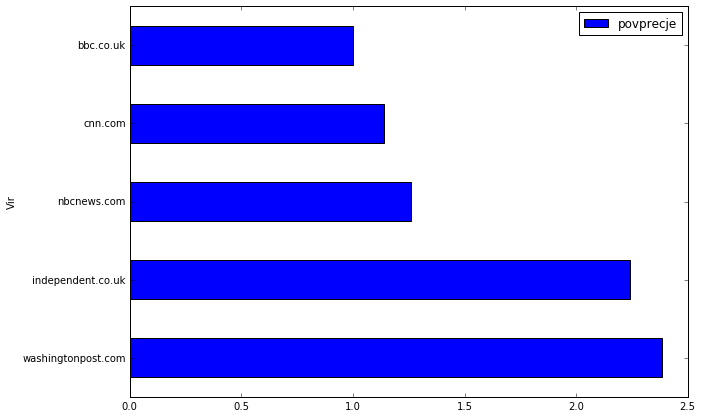

In [94]:
naj_viri_5[['Vir','povprecje']].plot(kind='barh',x='Vir', y='povprecje',figsize=(10,7))

In [97]:
vse_novice['povprecje']=vse_novice.iloc[:, 1:].mean(axis=1)
novice_vira(vse_novice,prvi_vir(naj_viri_5,0)).sort_values(['povprecje'],ascending=False).head()

,Naslov,Score,Komentarji,Vir,povprecje
823,Supreme Court legalizes gay marriage,5175,17029,washingtonpost.com,11102.0
360,Supreme Court legalizes gay marriage,5169,17029,washingtonpost.com,11099.0
7,"An ‘unarmed’ white teen was shot dead by police. His family asks: Where is the outrage? -- Hammond’s family released the results of a private autopsy, which concluded that both bullets entered Hammond’s body from the back.",8935,6352,washingtonpost.com,7643.5
4,A toddler got meningitis. His anti-vac parents gave him an herbal remedy. The toddler died. Now his parents are on trial.,9210,5801,washingtonpost.com,7505.5
892,"Kansas wants to ban welfare recipients from seeing movies, going swimming on government’s dime",5079,9562,washingtonpost.com,7320.5


#### Primerjava median ocen in komentarjev najpogostejših virov, ki se pojavijo v  kategorijah kontroverzno in najboljše 

In [122]:
#združimo po skupinah najboljše in kontroverzno po virih
kontroverznoV=pd.merge(news_con_viri.mean(),wnews_con_viri.mean(),on='Vir', how = 'left', suffixes=('_wnews_con', '_news_con'))
najboljseV=pd.merge(news_top_viri.mean(),wnews_top_viri.mean(),on='Vir', how ='left', suffixes=('_wnews_top', '_news_top'))
#nova stolpca za mediano kontroverzno in najboljše
kontroverznoV['povprecje_con']=kontroverznoV.mean(axis=1)
najboljseV['povprecje_top']=najboljseV.mean(axis=1)
# seznam najpogostejših virov
sez_naj10_con=list (naj10_con['Vir'])
sez_naj10_top=list (naj10_top['Vir'])

In [123]:
seznam_kategorij2=list (kontroverznoV.mean().reset_index()['index'])

for i in seznam_kategorij2:
    kontroverznoV[i] = kontroverznoV[i]/(kontroverznoV.mean()[i])

Kontroverzno_pogosti=kontroverznoV[(kontroverznoV['Vir']==sez_naj10_con[0])|
              (kontroverznoV['Vir']==sez_naj10_con[1])|
              (kontroverznoV['Vir']==sez_naj10_con[2])|
              (kontroverznoV['Vir']==sez_naj10_con[3])|
              (kontroverznoV['Vir']==sez_naj10_con[4])|
              (kontroverznoV['Vir']==sez_naj10_con[5])|
              (kontroverznoV['Vir']==sez_naj10_con[6])|
              (kontroverznoV['Vir']==sez_naj10_con[7])|
              (kontroverznoV['Vir']==sez_naj10_con[8])|
              (kontroverznoV['Vir']==sez_naj10_con[9])]
Kontroverzno_pogosti

,Vir,Score_wnews_con,Komentarji_wnews_con,Score_news_con,Komentarji_news_con,povprecje_con
35,bbc.co.uk,0.010489,0.039927,1.826026,2.055413,1.395273
79,cnn.com,0.081429,0.222494,2.834051,2.836240,2.071755
94,dailymail.co.uk,0.100762,0.104725,0.657872,0.890478,0.607329
137,foxnews.com,0.049907,0.203112,1.899402,6.608570,3.351396
173,independent.co.uk,2.469214,4.110962,3.346994,3.380452,3.898315
269,news.yahoo.com,0.089232,0.172219,0.158526,0.310438,0.235591
284,nytimes.com,2.920030,1.497161,0.404262,0.133202,1.154956
318,rt.com,1.552834,0.728763,0.393320,0.410447,0.790426
355,theguardian.com,0.878133,0.560984,2.577148,1.814947,1.824671
404,washingtonpost.com,2.254402,2.727398,6.098284,5.179874,5.062668


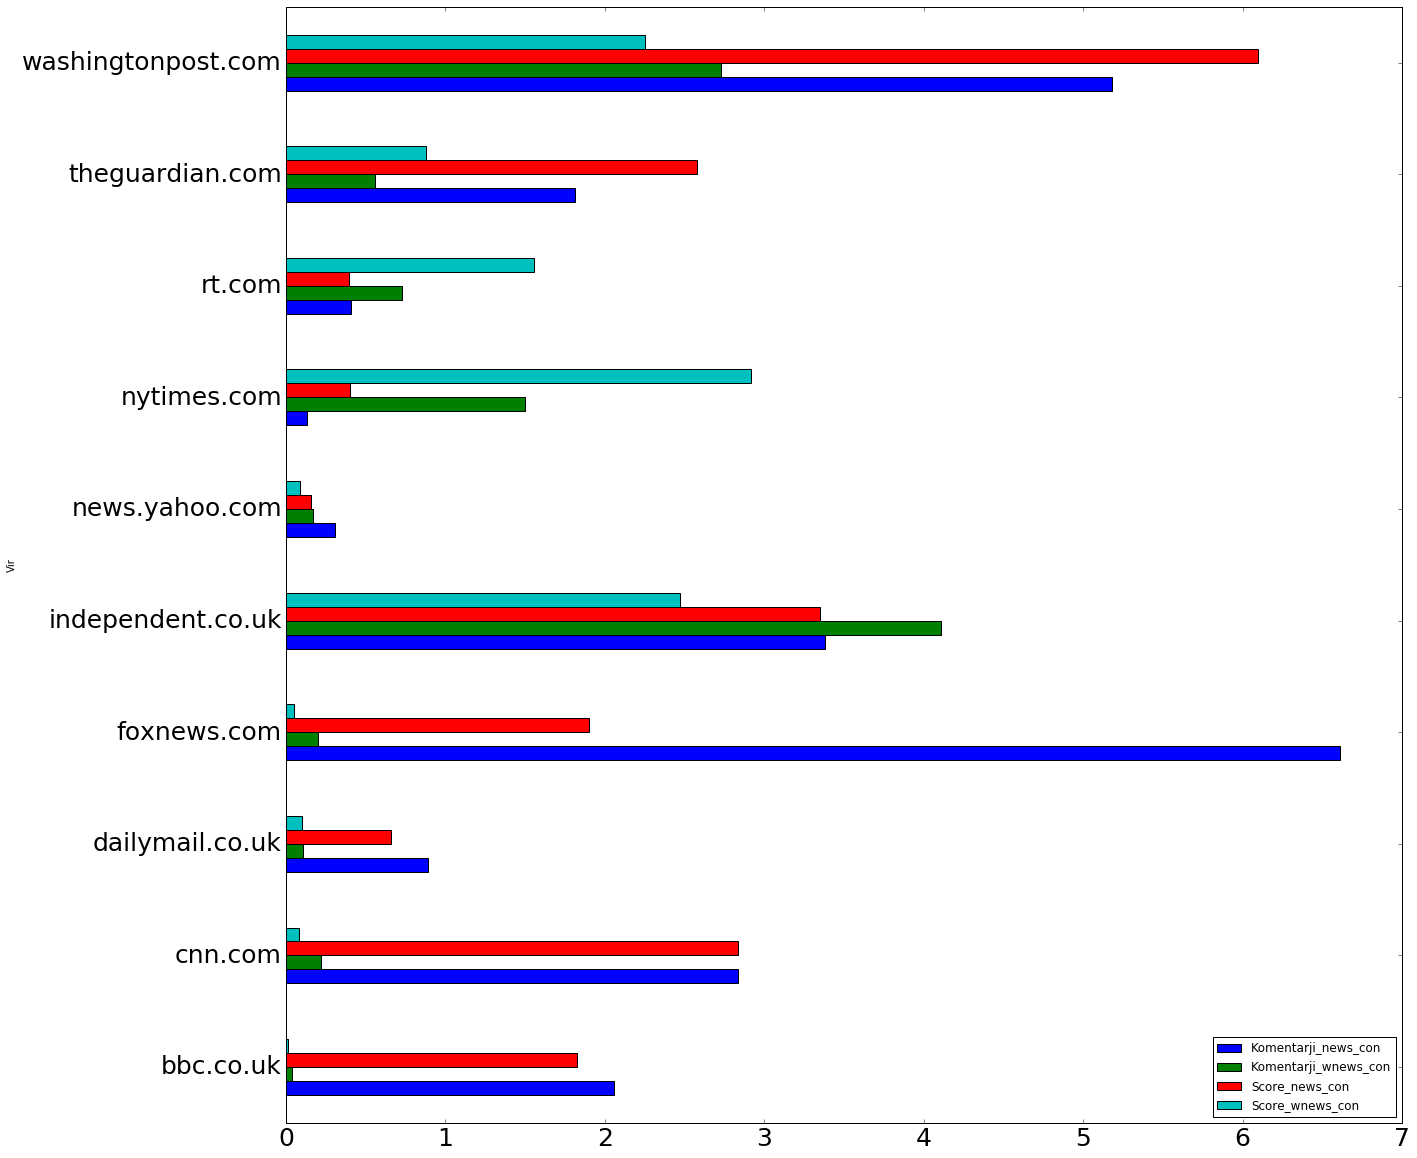

In [124]:
#primerjava komentarjev in ocen kategorije kontroverzno
Kontroverzno_pogosti[['Vir','Komentarji_news_con','Komentarji_wnews_con','Score_news_con','Score_wnews_con']].plot(x='Vir',kind='barh',stacked=False,figsize=(20,20),fontsize=25)

In [125]:
#Opazimo velik skok pri foxnews.com.
#Zanimajo nas naslovi novic.
vse_novice[vse_novice['Vir']=='foxnews.com'].sort_values(['Komentarji'],ascending=False).head()

,Naslov,Score,Komentarji,Vir,povprecje
27,Registered gun owners in the United Kingdom are now subject to unannounced visits to their homes under new guidance that allows police to inspect firearms storage without a warrant,1950,9505,foxnews.com,5727.5
758,Mississippi school district fined $7500 for opening assembly with prayer,5286,5316,foxnews.com,5301.0
312,'Severe blow': Al Qaeda suicide bomber takes out leadership of key ISIS brigade,6423,4549,foxnews.com,5486.0
893,"At least 1,000 doctors say Dr. Oz should resign",5078,3416,foxnews.com,4247.0
584,"Canada tries to cut cost of US drug, gets sued",5868,3032,foxnews.com,4450.0


Foxnews.com nam ponudi veliko perečih tem o katerih prebivalci ZDA radi debatirajo. O orožju, povezavi med vero in šolstvom, resničnostnih šovih in seveda vojaških posredovanjih. 

In [126]:
seznam_kategorij3 = list (najboljseV.mean().reset_index()['index'])

for i in seznam_kategorij3:
    najboljseV[i] = najboljseV[i]/(najboljseV.mean()[i])

Najboljse_pogosti=najboljseV[(najboljseV['Vir']==sez_naj10_top[0])|
              (najboljseV['Vir']==sez_naj10_top[1])|
              (najboljseV['Vir']==sez_naj10_top[2])|
              (najboljseV['Vir']==sez_naj10_top[3])|
              (najboljseV['Vir']==sez_naj10_top[4])|
              (najboljseV['Vir']==sez_naj10_top[5])|
              (najboljseV['Vir']==sez_naj10_top[6])|
              (najboljseV['Vir']==sez_naj10_top[7])|
              (najboljseV['Vir']==sez_naj10_top[8])|
              (najboljseV['Vir']==sez_naj10_top[9])]
Najboljse_pogosti


,Vir,Score_wnews_top,Komentarji_wnews_top,Score_news_top,Komentarji_news_top,povprecje_top
23,arstechnica.com,0.999677,0.717964,1.008425,0.385569,0.888801
28,bbc.co.uk,0.929899,1.919720,0.975866,1.420705,1.202796
29,bbc.com,0.972537,1.133170,0.968629,1.034310,1.029956
67,cnn.com,1.008501,1.597963,0.907524,1.201990,1.118820
149,independent.co.uk,0.991314,1.055471,0.975044,0.896264,1.005219
228,nbcnews.com,0.967846,1.272501,0.969401,1.289253,1.089804
261,nytimes.com,0.961672,1.033648,0.937487,1.173143,1.019899
286,reuters.com,1.011844,0.708854,0.928217,1.143101,0.976882
324,theguardian.com,0.980827,0.749995,0.974220,0.935236,0.958591
357,washingtonpost.com,1.027960,1.105458,0.934720,0.948526,1.018332


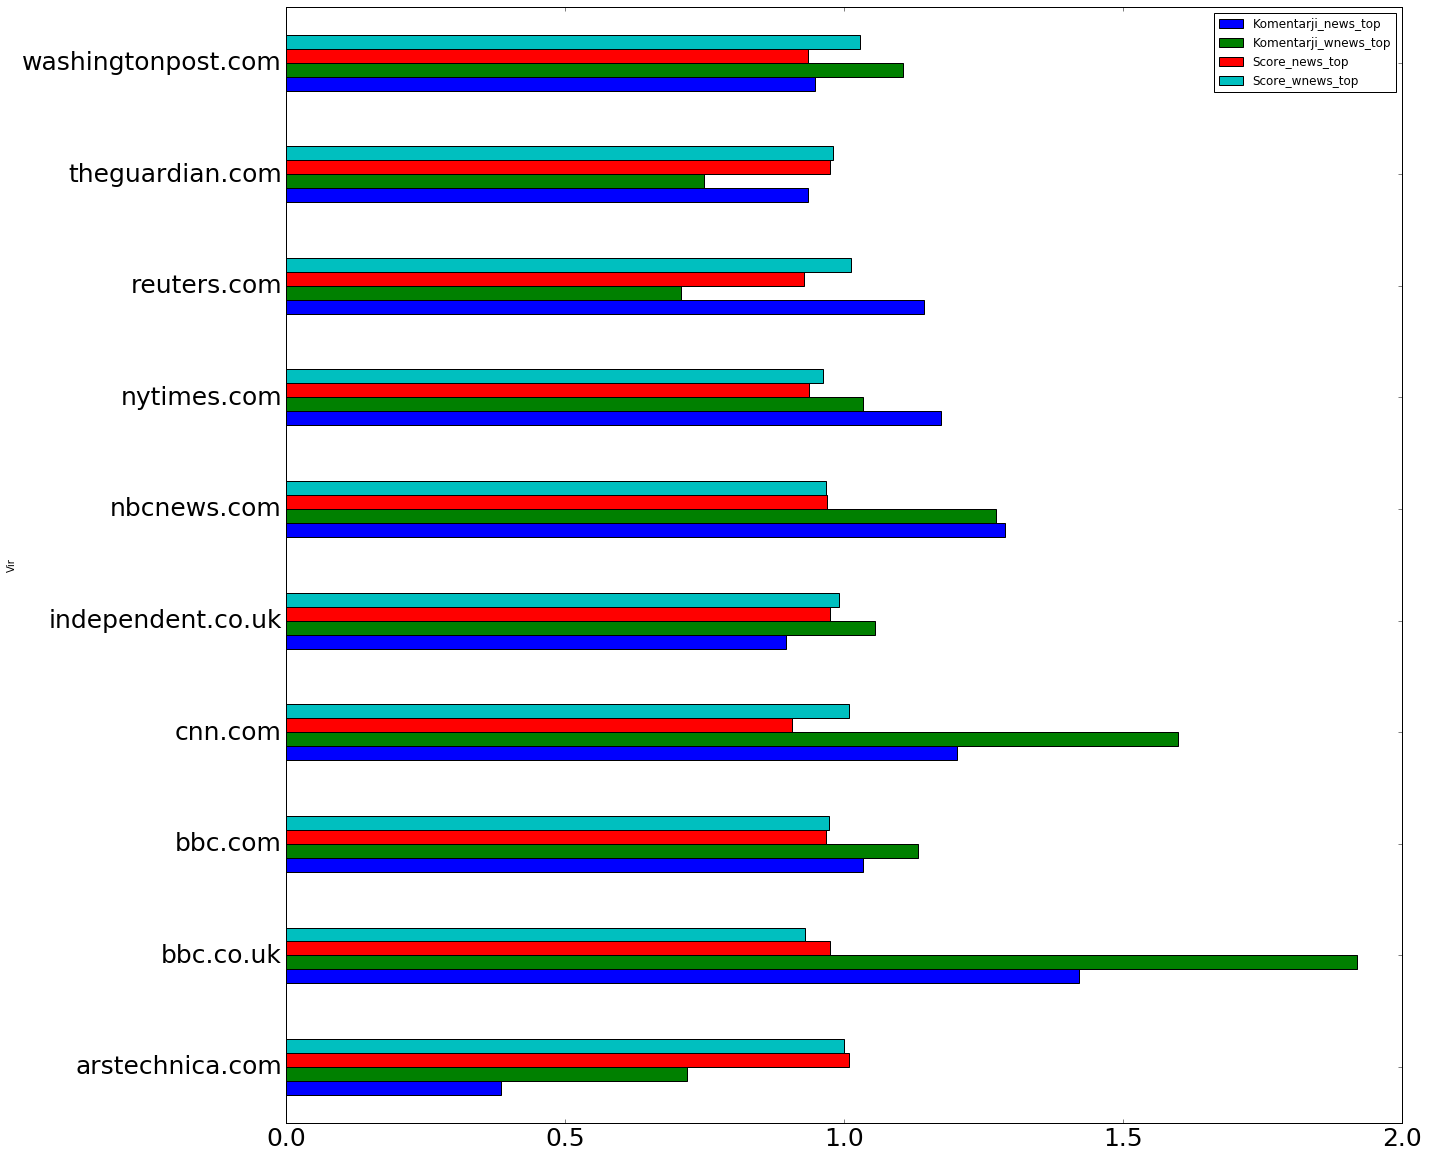

In [127]:
#primerjava komentarjev najboljse
Najboljse_pogosti[['Vir','Komentarji_news_top','Komentarji_wnews_top','Score_news_top','Score_wnews_top']].plot(x='Vir',kind='barh',stacked=False,figsize=(20,20),fontsize=25)

V kategoriji najboljše ima bbc.co.uk na splošno največ komentarjev. 

In [128]:
#Zanimajo nas naslovi novic.
vse_novice[vse_novice['Vir']=='bbc.co.uk'].sort_values(['Komentarji'],ascending=False).head()

,Naslov,Score,Komentarji,Vir,povprecje
11,'Shootings' reported in central Paris: Reports of shooting and casualties in central Paris,9968,28493,bbc.co.uk,19230.5
531,"Co-pilot has voluntarily crashed the plane, says investigation",5589,11007,bbc.co.uk,8298.0
751,US oil falls below $50 a barrel,5594,8289,bbc.co.uk,6941.5
298,'Shootings' reported in central Paris,6066,7767,bbc.co.uk,6916.5
817,Germanwings plane crash: Co-pilot 'started descent',5515,7700,bbc.co.uk,6607.5


Skok povzroči novica o terorističnem napadu v Parizu(11), ki ima skoraj trikrat več komentarjev komentarjev kot novica(531).
Opazimo tudi, da sta med 5 najbolj komentiranih novic bbc.co.uk dva para zapisov o isti novici. 
(11) in (298)o napadu v Parizu in (531) in (817) o strmoglavljenju letala Gremanwigs.

#### Kateri viri so izrazito kontroverzni?

In [130]:
skupna_viri=pd.merge(kontroverznoV,najboljseV,on= 'Vir', how = 'left')
skupna_viri['relativno']=skupna_viri.povprecje_con-skupna_viri.povprecje_top

In [131]:
skupna_viri.sort_values('relativno',ascending=False)[['Vir','relativno']].head()

,Vir,relativno
129,fox26houston.com,16.302675
277,nj.com,11.841107
294,perezhilton.com,7.802102
234,money.cnn.com,7.648140
37,bgr.com,5.866691


In [136]:
vse_novice[vse_novice['Vir']=='fox26houston.com'].sort_values(['Komentarji'],ascending=False).head()

,Naslov,Score,Komentarji,Vir,povprecje
501,US Marshals arresting people for not paying their federal student loans,4332,5804,fox26houston.com,5068.0
494,"No indictment against Planned Parenthood. This grand jury cleared PPGC of breaking the law. However, the grand jury did hand down indictments for two individuals who were involved in making the allegations against PPGC public via covert recordings made in April 2015.",5641,2101,fox26houston.com,3871.0


#### Kateri viri so izrazito najboljsi?

In [132]:
skupna_viri.sort_values('relativno')[['Vir','relativno']].head()

,Vir,relativno
245,mysanantonio.com,-2.356385
93,dailykos.com,-1.776639
426,wsj.com,-1.498144
119,ew.com,-1.458813
354,theglobeandmail.com,-1.389063


Oglejmo si še na katero stan se nagibajo prej omenjeni viri:

In [133]:
#The Guardian 
skupna_viri[skupna_viri['Vir']=='theguardian.com']

,Vir,Score_wnews_con,Komentarji_wnews_con,Score_news_con,Komentarji_news_con,povprecje_con,Score_wnews_top,Komentarji_wnews_top,Score_news_top,Komentarji_news_top,povprecje_top,relativno
355,theguardian.com,0.878133,0.560984,2.577148,1.814947,1.824671,0.980827,0.749995,0.97422,0.935236,0.958591,0.86608


In [134]:
#Russia Today 
skupna_viri[skupna_viri['Vir']=='rt.com']

,Vir,Score_wnews_con,Komentarji_wnews_con,Score_news_con,Komentarji_news_con,povprecje_con,Score_wnews_top,Komentarji_wnews_top,Score_news_top,Komentarji_news_top,povprecje_top,relativno
318,rt.com,1.552834,0.728763,0.39332,0.410447,0.790426,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
# The Dailymail
skupna_viri[skupna_viri['Vir']=='dailymail.co.uk']

,Vir,Score_wnews_con,Komentarji_wnews_con,Score_news_con,Komentarji_news_con,povprecje_con,Score_wnews_top,Komentarji_wnews_top,Score_news_top,Komentarji_news_top,povprecje_top,relativno
94,dailymail.co.uk,0.100762,0.104725,0.657872,0.890478,0.607329,NaN,NaN,NaN,NaN,NaN,NaN


Še dodatno lahko utrdimo hipotezo 3, saj vidimo, da se dailymail.com in rt.com sploh ne pojavita v kateoriji najboljše!

### Najpogostejše besede v naslovih 
vse_novice

In [178]:
from collections import Counter
pogostost_besed_con =Counter(" ".join(novice_kontroverzno["Naslov"]).lower().split()).most_common(100)
pogostost_besed_top =Counter(" ".join(novice_najboljse["Naslov"]).lower().split()).most_common(100)

In [179]:
pogostost_besed_top

[('to', 1142),
 ('the', 1123),
 ('of', 846),
 ('in', 812),
 ('a', 723),
 ('and', 509),
 ('for', 498),
 ('on', 296),
 ('is', 244),
 ('that', 216),
 ('with', 215),
 ('has', 196),
 ('from', 186),
 ('after', 186),
 ('as', 169),
 ('by', 168),
 ('police', 154),
 ('who', 152),
 ('at', 151),
 ('have', 124),
 ('be', 121),
 ('was', 120),
 ('new', 106),
 ('will', 104),
 ('are', 103),
 ('it', 103),
 ('says', 102),
 ('an', 101),
 ('over', 93),
 ('man', 93),
 ('not', 89),
 ('-', 88),
 ('their', 88),
 ('his', 88),
 ('he', 87),
 ('been', 84),
 ('us', 83),
 ('its', 77),
 ('first', 76),
 ('they', 71),
 ('than', 70),
 ('years', 68),
 ('government', 66),
 ('all', 64),
 ('u.s.', 63),
 ('marijuana', 61),
 ('up', 61),
 ('state', 61),
 ('out', 60),
 ('more', 59),
 ('million', 58),
 ('into', 57),
 ('people', 56),
 ('no', 55),
 ('against', 54),
 ('court', 53),
 ('found', 53),
 ('were', 53),
 ('now', 51),
 ('saudi', 50),
 ('bill', 50),
 ('isis', 50),
 ('law', 49),
 ('her', 49),
 ('about', 48),
 ('or', 48),
 ('dr

Med najpogostejšimi besedami najboljše najdemo: police, government, US, marijuana, state, people

In [180]:
pogostost_besed_con

[('the', 845),
 ('to', 740),
 ('of', 634),
 ('in', 621),
 ('a', 434),
 ('and', 358),
 ('for', 275),
 ('on', 251),
 ('is', 218),
 ('by', 174),
 ('from', 151),
 ('with', 149),
 ('at', 149),
 ('that', 127),
 ('israel', 122),
 ('-', 121),
 ('israeli', 114),
 ('have', 113),
 ('are', 107),
 ('as', 107),
 ('was', 102),
 ('be', 100),
 ('says', 95),
 ('after', 93),
 ('has', 89),
 ('us', 86),
 ('who', 83),
 ('gaza', 83),
 ('an', 81),
 ('it', 79),
 ('than', 78),
 ('not', 75),
 ('his', 74),
 ('you', 72),
 ('more', 68),
 ('new', 67),
 ('this', 64),
 ('they', 63),
 ('man', 62),
 ('over', 60),
 ('their', 60),
 ('people', 58),
 ('out', 57),
 ('no', 57),
 ('palestinian', 56),
 ('killed', 55),
 ('all', 52),
 ('i', 52),
 ('into', 51),
 ('about', 51),
 ('obama', 50),
 ('been', 49),
 ('will', 49),
 ('her', 46),
 ('against', 46),
 ('were', 45),
 ('gun', 44),
 ('if', 44),
 ('now', 44),
 ('world', 42),
 ('attack', 42),
 ('police', 41),
 ('u.s.', 41),
 ('hamas', 39),
 ('up', 39),
 ('one', 38),
 ('just', 37),
 

Med najpogostejšimi besedami kontroverzno najdemo : Israel, Gaza, palestinian, people, killed

Razlika s seznamom besed kategorije najboljše je očitna. 

Dodatno lahko ugotovimo tudi, da je konflikt Izraela in Palestine eden izmed najkontroverznejših tem na Redditu.

#### Zaključek
Analiza novic je potrdila 2 moji hipotezi in eno ovrgla. Skozi celotno analizo se je kazala očitna razlika med kategorijama najboljše in kontroverzno. Prva razlika se pojavi v kakovosti virov. Druga velika pa v pogostosti besed. V razdelku kontroverzno se pojavijo pogosteje besede, ki so pač kontroverzne. 
Ugotavljam, da je Reddit levo usmerjena platfoma z prostorom za debatiranje o kontraveznejših temah.